# Установка нужных библиотек

In [1]:
import warnings
warnings.filterwarnings("ignore")

try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
    
if IN_COLAB:
    !git clone -qq https://github.com/Intelligent-Systems-Phystech/ProjectTemplate.git /tmp/repo
    !python3 -m pip install -qq /tmp/repo/src/ && rm -rf /tmp/repo

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


# Импорт библиотек

In [4]:
import os

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

#from mylib.train import cv_parameters, Trainer, SyntheticBernuliDataset

In [9]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

m = torch.nn.Softmax(dim=1)
input = torch.randn(2, 3)
output = m(input)

#t = torch.tensor([[-2, 2, -2], [1, 2, 3]])
#m(t)

c:\Users\pkbab\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# fashionMNIST

## Анализ точности в зависимости от $\lambda$

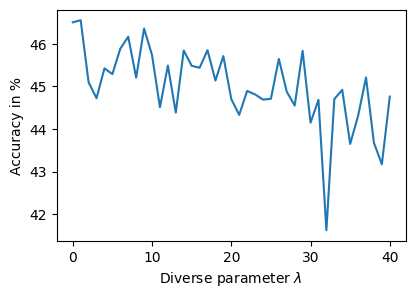

In [10]:
accuracies = np.array([92.10000213623046, 92.21000200271606, 89.2900018119812, 88.54000202178955, 89.95000173568726,
                    89.66000192642212, 90.86000188827514, 91.43000192642212, 89.51000211715698, 91.81000192642212,
                    90.5900019454956, 88.12000221252442, 90.07000164031982, 87.88000198364257, 90.79000204086304,
                    90.09000160217285,  89.98, 90.80, 89.38, 90.54000162124634,
                    88.52000213623047, 87.81000207901001, 88.90000204086304, 88.77000219345093, 88.52000226974487,
                        88.54000192642212, 90.42000213623047, 88.87000198364258, 88.22000188827515, 90.8000019454956,
                        87.42000196456909, 88.50000179290771, 82.36000217437744, 88.54000204086304, 88.96000175476074,
                        86.4100023651123, 87.74000205993653, 89.54000205993652, 86.47000160217285, 85.45000200271606, 88.67000240325927])
accuracies1 = np.array([0.9160000205993653, 0.9036000211715698, 0.9045000234603882, 0.9071000200271606, 0.9016000196456909, 0.9206000205993652,
                        0.9159000225067139, 0.9067000213623047, 0.9047000200271607, 0.9141000200271606, 0.889800020980835, 0.9048000202178955,
                        0.9133000202178955, 0.8928000202178955, 0.899800020980835, 0.8825000177383423, 0.8978000186920166, 0.9066000225067139,
                        0.8986000207901002, 0.889000018119812, 0.8892000228881836, 0.8546000183105469, 0.8886000183105469, 0.8583000213623047,
                        0.8621000177383423, 0.8800000179290771, 0.8741000194549561, 0.8831000207901001, 0.8834000171661377, 0.8739000213623047,
                        0.8771000213623047, 0.8745000202178955, 0.8841000215530396, 0.8682000194549561, 0.8825000219345093, 0.888600022315979,
                        0.8791000221252442, 0.8839000202178955, 0.875100020980835, 0.896300019645691, 0.8530000209808349])
accuracies = (accuracies + accuracies1) / 2
# 1: 0.9221000200271606, 0.892900018119812, 0.8854000202178955, 0.8995000173568726, 0.8966000192642212, 0.9086000188827514, 0.9143000192642212, 0.8951000211715698, 0.9181000192642212, 10: 0.905900019454956, 0.8812000221252442, 0.9007000164031982, 0.8788000198364257, 0.9079000204086304, 15: 0.9009000160217285
# [0: 0.9210000213623046, 19: 0.9054000162124634, 0.8852000213623047, 0.8781000207901001, 0.8890000204086304, 0.8877000219345093, 0.8852000226974487, 0.8854000192642212, 0.9042000213623047, 0.8887000198364258, 28: 0.8822000188827515]
# 87.86 - 28
# [0.908000019454956, 0.8742000196456909, 0.8850000179290771, 0.8236000217437744, 0.8854000204086304, 0.8896000175476074, 0.864100023651123, 0.8774000205993653, 0.8954000205993652, 0.8647000160217285, 0.8545000200271606, 0.8867000240325927]
lambdas = range(len(accuracies))
plt.figure(figsize=(4.5, 3))
plt.plot(lambdas, accuracies)
plt.ylabel("Accuracy in %")
plt.xlabel("Diverse parameter $\lambda$")
plt.savefig("../figures/Fig2.jpg")

## Поиск одинаковых операций

In [12]:
arcs = []
for lamb in lambdas:
    with open(f'checkpoints/{lamb}/arc1.json') as f:
        arc = json.load(f) # оптимальная архитектура в виде словаря
        arcs.append(arc)

In [13]:
all_intersections = []
for arc in arcs:
    intersections = []
    for other_arc in arcs:
        same = 0
        for k in arc.keys():
            if arc[k] == other_arc[k]:
                same += 1
        intersections.append(same / 18)
    all_intersections.append(intersections)
print(all_intersections[0])

[1.0, 0.16666666666666666, 0.1111111111111111, 0.2222222222222222, 0.2222222222222222, 0.16666666666666666, 0.2222222222222222, 0.2222222222222222, 0.2222222222222222, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.2222222222222222, 0.2777777777777778, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.05555555555555555, 0.16666666666666666, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.05555555555555555, 0.16666666666666666, 0.1111111111111111, 0.2222222222222222, 0.2222222222222222, 0.1111111111111111, 0.1111111111111111, 0.2777777777777778, 0.16666666666666666, 0.16666666666666666]


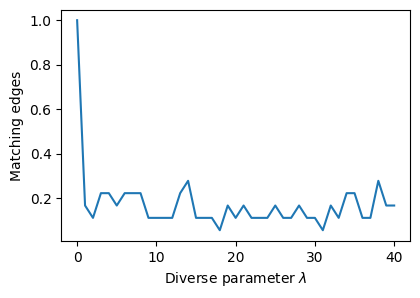

In [14]:
inter_with_optim = [all_intersections[i][0] for i in range(len(arcs))]
plt.figure(figsize=(4.5, 3))
plt.plot(lambdas, inter_with_optim)
plt.ylabel("Matching edges")
plt.xlabel("Diverse parameter $\lambda$")
plt.savefig("../figures/Fig3.jpg")

## Анализ эффективности ансамблирования

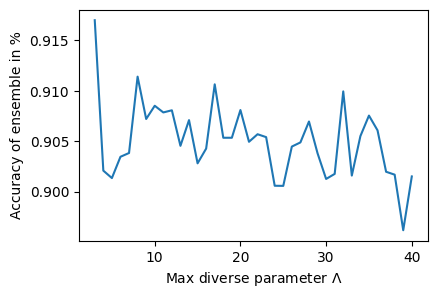

In [15]:
Lambdas = range(3, 41)
reses = []
reses.append({3: 0.9170000200271606, 4: 0.9006000185012817, 5: 0.905000019454956, 6: 0.9006000185012817, 7: 0.9057000188827514, 8: 0.9080000211715699, 9: 0.908800020980835, 10: 0.9169000175476074, 11: 0.9118000169754028, 12: 0.8968000175476074, 13: 0.9018000179290772, 14: 0.8931000236511231, 15: 0.9096000185012817, 16: 0.9103000204086303, 17: 0.910100019454956, 18: 0.9049000198364258, 19: 0.8996000200271607, 20: 0.9119000183105469, 21: 0.9090000185012818, 22: 0.9055000186920166, 23: 0.9088000186920167, 24: 0.8998000204086304, 25: 0.8962000204086303, 26: 0.8992000238418579, 27: 0.9050000211715699, 28: 0.9149000200271606, 29: 0.9055000209808349, 30: 0.8930000183105469, 31: 0.8995000204086304, 32: 0.9066000213623047, 33: 0.8967000219345093, 34: 0.9161000205993652, 35: 0.905600019454956, 36: 0.9082000198364257, 37: 0.9043000179290771, 38: 0.8978000217437744, 39: 0.9084000207901001, 40: 0.8948000205993653, 41: 0.8919000213623047})
reses.append({3: 0.9170000200271606, 4: 0.899900019454956, 5: 0.9006000185012817, 6: 0.894700020980835, 7: 0.9033000223159791, 8: 0.9098000200271606, 9: 0.9046000186920166, 10: 0.899900019454956, 11: 0.9063000190734863, 12: 0.9051000202178955, 13: 0.8951000205993652, 14: 0.9136000186920166, 15: 0.9044000194549561, 16: 0.9111000202178955, 17: 0.9029000200271606, 18: 0.9065000164031982, 19: 0.9049000198364258, 20: 0.9062000160217285, 21: 0.8907000185012818, 22: 0.9056000188827514, 23: 0.9040000175476074, 24: 0.9065000200271607, 25: 0.8931000236511231, 26: 0.9001000215530396, 27: 0.9007000186920165, 28: 0.9195000179290771, 29: 0.8985000188827514, 30: 0.8983000186920166, 31: 0.9031000215530396, 32: 0.9060000196456909, 33: 0.9027000207901001, 34: 0.9081000190734864, 35: 0.9130000192642211, 36: 0.9007000204086304, 37: 0.8894000177383423, 38: 0.9173000194549561, 39: 0.8929000175476074, 40: 0.9158000217437744, 41: 0.9048000202178955})
reses.append({3: 0.9170000200271606, 4: 0.9152000211715698, 5: 0.8944000169754028, 6: 0.9029000200271606, 7: 0.9077000171661377, 8: 0.9117000190734863, 9: 0.9030000207901001, 10: 0.9013000204086303, 11: 0.9101000175476074, 12: 0.9044000194549561, 13: 0.9098000200271606, 14: 0.9090000190734864, 15: 0.8998000204086304, 16: 0.9037000204086304, 17: 0.9114000207901001, 18: 0.909700018119812, 19: 0.9093000219345093, 20: 0.9061000185012817, 21: 0.8974000198364258, 22: 0.8965000204086304, 23: 0.8990000200271606, 24: 0.8938000221252441, 25: 0.9085000215530395, 26: 0.8978000217437744, 27: 0.9117000190734863, 28: 0.9112000192642212, 29: 0.9014000194549561, 30: 0.9107000188827514, 31: 0.9021000202178955, 32: 0.9082000204086303, 33: 0.9118000198364258, 34: 0.9069000213623047, 35: 0.9043000198364258, 36: 0.912400018119812, 37: 0.9002000194549561, 38: 0.8957000171661377, 39: 0.8877000196456909, 40: 0.9007000192642212, 41: 0.9057000213623047})
reses.append({3: 0.9170000200271606, 4: 0.899900019454956, 5: 0.905000019454956, 6: 0.894700020980835, 7: 0.9071000200271606, 8: 0.9001000190734864, 9: 0.9113000211715698, 10: 0.9046000186920166, 11: 0.9033000202178955, 12: 0.9113000205993652, 13: 0.9141000162124634, 14: 0.9012000173568726, 15: 0.910700019454956, 16: 0.8939000200271606, 17: 0.9117000213623047, 18: 0.9065000200271607, 19: 0.9172000169754029, 20: 0.9154000186920166, 21: 0.9085000192642212, 22: 0.9045000230789184, 23: 0.9073000198364258, 24: 0.9066000202178955, 25: 0.9102000202178955, 26: 0.9022000164031982, 27: 0.8979000213623047, 28: 0.902000019454956, 29: 0.9047000211715698, 30: 0.9007000215530395, 31: 0.9090000190734864, 32: 0.9199000204086304, 33: 0.8960000211715698, 34: 0.8954000228881835, 35: 0.9022000198364257, 36: 0.905900019454956, 37: 0.8990000205993652, 38: 0.903400018119812, 39: 0.9033000200271607, 40: 0.8908000204086304, 41: 0.9175000198364258})
reses.append({3: 0.9170000200271606, 4: 0.899900019454956, 5: 0.9057000188827514, 6: 0.9101000175476074, 7: 0.8974000198364258, 8: 0.9151000186920166, 9: 0.9131000217437744, 10: 0.9080000188827515, 11: 0.905000019454956, 12: 0.9114000207901001, 13: 0.9047000205993653, 14: 0.8971000169754029, 15: 0.895700019454956, 16: 0.9046000186920166, 17: 0.9167000171661377, 18: 0.916100018119812, 19: 0.8914000186920166, 20: 0.9066000213623047, 21: 0.9073000198364258, 22: 0.9086000188827514, 23: 0.9106000221252442, 24: 0.898300018119812, 25: 0.9115000209808349, 26: 0.9145000169754028, 27: 0.8964000225067139, 28: 0.8923000209808349, 29: 0.9147000225067139, 30: 0.9056000165939331, 31: 0.9136000186920166, 32: 0.9164000177383422, 33: 0.899100019645691, 34: 0.9115000221252442, 35: 0.9121000186920166, 36: 0.9068000171661377, 37: 0.9097000204086304, 38: 0.8981000194549561, 39: 0.9108000207901001, 40: 0.9124000186920166, 41: 0.9032000205993652})
reses.append({3: 0.9170000200271606, 4: 0.899900019454956, 5: 0.9057000188827514, 6: 0.9170000200271606, 7: 0.894700020980835, 8: 0.9117000190734863, 9: 0.9041000200271606, 10: 0.9147000196456909, 11: 0.9170000200271606, 12: 0.9176000165939331, 13: 0.8960000198364257, 14: 0.9156000196456909, 15: 0.9052000204086303, 16: 0.8920000198364257, 17: 0.9081000190734864, 18: 0.9033000202178955, 19: 0.9073000221252442, 20: 0.9099000196456909, 21: 0.9099000179290772, 22: 0.9176000188827514, 23: 0.9085000192642212, 24: 0.8918000228881836, 25: 0.8902000192642212, 26: 0.9114000190734863, 27: 0.911500018119812, 28: 0.9076000198364258, 29: 0.9096000196456909, 30: 0.9040000186920166, 31: 0.8895000213623047, 32: 0.9106000209808349, 33: 0.9102000202178955, 34: 0.9035000200271607, 35: 0.9025000204086304, 36: 0.8945000200271607, 37: 0.9053000183105469, 38: 0.8938000202178955, 39: 0.8963000211715698, 40: 0.8994000219345093, 41: 0.9069000185012818})
reses.append({3: 0.9170000200271606, 4: 0.9006000185012817, 5: 0.8944000169754028, 6: 0.9077000171661377, 7: 0.9134000200271607, 8: 0.9159000196456909, 9: 0.9062000204086303, 10: 0.9133000185012817, 11: 0.9033000223159791, 12: 0.9114000207901001, 13: 0.9112000204086304, 14: 0.9060000185012818, 15: 0.8968000175476074, 16: 0.9067000192642212, 17: 0.9081000179290771, 18: 0.9007000186920165, 19: 0.901700019454956, 20: 0.893200018119812, 21: 0.9148000186920165, 22: 0.9169000175476074, 23: 0.9102000213623047, 24: 0.9083000211715698, 25: 0.8950000192642212, 26: 0.9023000211715698, 27: 0.9065000194549561, 28: 0.913900018119812, 29: 0.9023000200271607, 30: 0.8937000219345093, 31: 0.8987000165939331, 32: 0.9154000204086303, 33: 0.9019000215530395, 34: 0.9069000213623047, 35: 0.9101000177383423, 36: 0.909400018119812, 37: 0.8986000198364258, 38: 0.9097000204086304, 39: 0.8855000217437744, 40: 0.9001000215530396, 41: 0.908200020980835})
reses.append({3: 0.9170000200271606, 4: 0.9006000185012817, 5: 0.899900019454956, 6: 0.899900019454956, 7: 0.9013000164031982, 8: 0.9189000179290772, 9: 0.9065000194549561, 10: 0.9094000175476075, 11: 0.9060000225067139, 12: 0.9065000200271607, 13: 0.9036000179290772, 14: 0.9211000192642211, 15: 0.9002000188827515, 16: 0.9118000169754028, 17: 0.9161000188827515, 18: 0.8950000215530396, 19: 0.9113000205993652, 20: 0.9154000186920166, 21: 0.9019000192642211, 22: 0.8903000211715698, 23: 0.8948000205993653, 24: 0.8995000204086304, 25: 0.8998000186920166, 26: 0.9082000192642212, 27: 0.9093000213623047, 28: 0.8942000211715698, 29: 0.8937000207901001, 30: 0.9040000204086304, 31: 0.8985000213623047, 32: 0.8964000219345093, 33: 0.8943000202178955, 34: 0.8956000198364258, 35: 0.9105000202178956, 36: 0.9107000188827514, 37: 0.9092000217437745, 38: 0.8976000228881836, 39: 0.8844000196456909, 40: 0.8980000186920166, 41: 0.8923000152587891})
accuracies_of_3_arc = []
for Lambda in Lambdas:
    summa = sum([res[Lambda] for res in reses])
    accuracies_of_3_arc.append((summa) / len(reses))
plt.figure(figsize=(4.5, 3))
plt.plot(Lambdas, accuracies_of_3_arc)
plt.ylabel("Accuracy of ensemble in %")
plt.xlabel("Max diverse parameter $\Lambda$")
plt.savefig("../figures/Fig4.jpg")

In [16]:
with open('checkpoint_optimum.json') as f:
    checkpoint_optimum = json.load(f) # оптимальная архитектура в виде словаря
with open('checkpoint_lamb_0_0_0_0_1.json') as f:
    checkpoint_optimum1 = json.load(f) # оптимальная архитектура в виде словаря

diff = 0
for k in checkpoint_optimum.keys():
    if checkpoint_optimum[k] != checkpoint_optimum1[k]:
        diff += 1
print(diff)
print(len(checkpoint_optimum))

FileNotFoundError: [Errno 2] No such file or directory: 'checkpoint_optimum.json'

# CIFAR10

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## Анализ точности в зависимости от $\lambda$

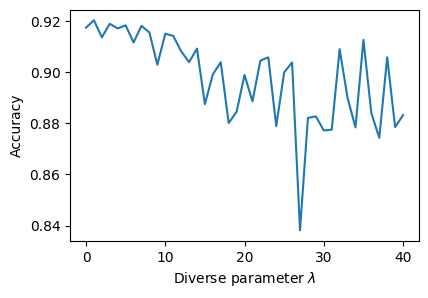

In [17]:
accuracies = np.array([0.9174000198364258, 0.9203000194549561, 0.9136000228881835, 0.9189000211715698, 0.9171000211715699, 0.9183000194549561, 0.9116000217437744, 0.9181000202178955, 0.915500022315979, 0.9029000200271606, 0.9150000183105469, 0.9142000221252441, 0.9082000207901001, 0.9039000183105469, 0.9092000204086303, 0.887500018119812, 0.8991000202178955, 0.9039000183105469, 0.8801000211715698, 0.8845000221252441, 0.8989000186920166, 0.8886000167846679, 0.9045000217437744, 0.9058000219345093, 0.8789000183105469, 0.8999000217437744, 0.903800020980835, 0.838200020980835, 0.8821000225067138, 0.8827000167846679, 0.8772000196456909, 0.8775000213623046, 0.9090000185012818, 0.8899000192642212, 0.8784000202178955, 0.9126000188827514, 0.8840000200271606, 0.8743000169754028, 0.9058000175476074, 0.8785000190734863, 0.8832000207901001])
# 1: 0.9221000200271606, 0.892900018119812, 0.8854000202178955, 0.8995000173568726, 0.8966000192642212, 0.9086000188827514, 0.9143000192642212, 0.8951000211715698, 0.9181000192642212, 10: 0.905900019454956, 0.8812000221252442, 0.9007000164031982, 0.8788000198364257, 0.9079000204086304, 15: 0.9009000160217285
# [0: 0.9210000213623046, 19: 0.9054000162124634, 0.8852000213623047, 0.8781000207901001, 0.8890000204086304, 0.8877000219345093, 0.8852000226974487, 0.8854000192642212, 0.9042000213623047, 0.8887000198364258, 28: 0.8822000188827515]
# 87.86 - 28
# [0.908000019454956, 0.8742000196456909, 0.8850000179290771, 0.8236000217437744, 0.8854000204086304, 0.8896000175476074, 0.864100023651123, 0.8774000205993653, 0.8954000205993652, 0.8647000160217285, 0.8545000200271606, 0.8867000240325927]
lambdas = range(len(accuracies))
plt.figure(figsize=(4.5, 3))
plt.plot(lambdas, accuracies)
plt.ylabel("Accuracy")
plt.xlabel("Diverse parameter $\lambda$")
plt.savefig("../figures/Fig2.jpg")

## Поиск одинаковых операций

In [21]:
arcs = []
for lamb in lambdas:
    with open(f'checkpoints/{lamb}/arc_cifar.json') as f:
        arc = json.load(f) # оптимальная архитектура в виде словаря
        arcs.append(arc)

In [22]:
all_intersections = []
for arc in arcs:
    intersections = []
    for other_arc in arcs:
        same = 0
        for k in arc.keys():
            if arc[k] == other_arc[k]:
                same += 1
        intersections.append(same / 18)
    all_intersections.append(intersections)
print(all_intersections[0])

[1.0, 0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.0, 0.16666666666666666, 0.1111111111111111, 0.05555555555555555, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.1111111111111111, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.1111111111111111, 0.2222222222222222, 0.1111111111111111, 0.16666666666666666, 0.2222222222222222, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]


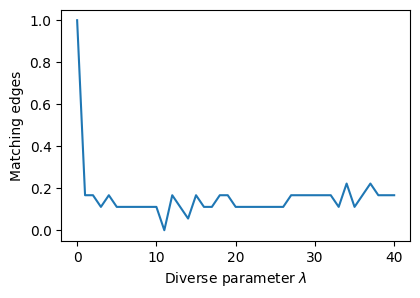

In [23]:
inter_with_optim = [all_intersections[i][0] for i in range(len(arcs))]
plt.figure(figsize=(4.5, 3))
plt.plot(lambdas, inter_with_optim)
plt.ylabel("Matching edges")
plt.xlabel("Diverse parameter $\lambda$")
plt.savefig("../figures/Fig3.jpg")

## Анализ эффективности ансамблирования

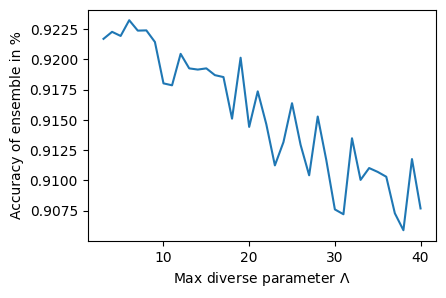

In [24]:
Lambdas = range(3, 41)
reses = []
reses.append({3: 0.921700022315979, 4: 0.9222000177383423, 5: 0.9222000177383423, 6: 0.9237000200271607, 7: 0.9237000171661377, 8: 0.9224000198364258, 9: 0.9193000179290771, 10: 0.9217000196456909, 11: 0.9162000194549561, 12: 0.9204000188827515, 13: 0.9222000183105469, 14: 0.9154000169754029, 15: 0.9205000202178955, 16: 0.9219000188827514, 17: 0.9206000198364258, 18: 0.9191000221252441, 19: 0.9205000202178955, 20: 0.9185000198364258, 21: 0.9149000186920166, 22: 0.9154000204086303, 23: 0.908000019454956, 24: 0.9098000211715698, 25: 0.9215000204086303, 26: 0.9160000173568725, 27: 0.9188000204086304, 28: 0.9186000196456909, 29: 0.9091000196456909, 30: 0.9042000207901001, 31: 0.904700019454956, 32: 0.9139000198364258, 33: 0.9192000219345092, 34: 0.9149000188827515, 35: 0.9106000192642212, 36: 0.9206000186920166, 37: 0.9075000190734863, 38: 0.9149000175476074, 39: 0.912700018119812, 40: 0.9129000185012818, 41: 0.8940000202178955})
reses.append({3: 0.921700022315979, 4: 0.9222000177383423, 5: 0.9220000196456909, 6: 0.9249000200271607, 7: 0.9238000173568726, 8: 0.921700022315979, 9: 0.9220000190734863, 10: 0.9197000198364258, 11: 0.9190000185012818, 12: 0.9232000204086304, 13: 0.9220000190734863, 14: 0.9231000205993652, 15: 0.9104000200271607, 16: 0.9131000198364257, 17: 0.9136000204086304, 18: 0.9217000179290772, 19: 0.9180000205993653, 20: 0.9159000202178955, 21: 0.9176000165939331, 22: 0.9135000205993652, 23: 0.9176000190734863, 24: 0.9143000194549561, 25: 0.9118000202178955, 26: 0.9207000196456909, 27: 0.9065000137329101, 28: 0.9114000179290771, 29: 0.902200020980835, 30: 0.9152000186920166, 31: 0.8943000207901001, 32: 0.9104000177383423, 33: 0.923300020980835, 34: 0.9017000188827514, 35: 0.9202000211715698, 36: 0.9128000211715698, 37: 0.8937000196456909, 38: 0.9134000194549561, 39: 0.9128000175476074, 40: 0.8971000169754029, 41: 0.9085000198364258})
reses.append({3: 0.921700022315979, 4: 0.9222000177383423, 5: 0.9218000186920166, 6: 0.9222000188827515, 7: 0.9210000200271606, 8: 0.9235000190734863, 9: 0.9218000211715698, 10: 0.9181000156402588, 11: 0.9213000194549561, 12: 0.9213000202178955, 13: 0.9157000196456909, 14: 0.9211000183105469, 15: 0.9206000198364258, 16: 0.9189000217437744, 17: 0.9192000177383423, 18: 0.9121000211715699, 19: 0.9216000188827514, 20: 0.9171000190734864, 21: 0.9163000192642212, 22: 0.9162000194549561, 23: 0.9144000205993652, 24: 0.9160000226974487, 25: 0.9179000160217285, 26: 0.9148000196456909, 27: 0.9097000192642212, 28: 0.9204000228881836, 29: 0.9218000204086304, 30: 0.9070000192642212, 31: 0.9081000213623047, 32: 0.9177000200271607, 33: 0.911400019645691, 34: 0.9120000202178955, 35: 0.9068000221252441, 36: 0.8956000198364258, 37: 0.9150000205993652, 38: 0.9048000188827514, 39: 0.9135000188827515, 40: 0.9086000188827514, 41: 0.9128000183105469})
reses.append({3: 0.921700022315979, 4: 0.9237000171661377, 5: 0.9220000196456909, 6: 0.921500018119812, 7: 0.9200000198364258, 8: 0.921500018119812, 9: 0.921700022315979, 10: 0.9162000194549561, 11: 0.9136000181198121, 12: 0.9193000192642212, 13: 0.9142000198364257, 14: 0.9177000217437744, 15: 0.9237000194549561, 16: 0.9186000185012817, 17: 0.9232000207901001, 18: 0.9072000185012817, 19: 0.9187000185012817, 20: 0.9105000202178956, 21: 0.9152000205993652, 22: 0.9096000205993653, 23: 0.9137000205993653, 24: 0.9103000213623047, 25: 0.9146000194549561, 26: 0.9056000211715698, 27: 0.908800023651123, 28: 0.9197000186920166, 29: 0.9123000194549561, 30: 0.9016000209808349, 31: 0.9115000211715698, 32: 0.9086000217437744, 33: 0.890300022315979, 34: 0.9169000190734863, 35: 0.9204000183105469, 36: 0.9179000205993653, 37: 0.9174000207901001, 38: 0.9107000188827514, 39: 0.9057000183105469, 40: 0.9089000200271606, 41: 0.9115000169754028})
reses.append({3: 0.921700022315979, 4: 0.9211000183105469, 5: 0.921700022315979, 6: 0.9239000169754028, 7: 0.9234000211715698, 8: 0.9229000185012818, 9: 0.9224000204086303, 10: 0.9144000200271607, 11: 0.9192000177383423, 12: 0.9181000156402588, 13: 0.9222000188827515, 14: 0.9185000194549561, 15: 0.9211000207901001, 16: 0.9210000202178955, 17: 0.9161000183105469, 18: 0.9154000190734863, 19: 0.9219000165939331, 20: 0.9101000205993652, 21: 0.9228000200271607, 22: 0.9185000177383423, 23: 0.9025000192642212, 24: 0.9154000213623047, 25: 0.916100019454956, 26: 0.9076000185012817, 27: 0.9083000175476075, 28: 0.9063000230789184, 29: 0.9130000215530395, 30: 0.9100000185012818, 31: 0.9174000217437744, 32: 0.9168000205993653, 33: 0.9060000213623047, 34: 0.9096000202178955, 35: 0.8955000225067139, 36: 0.9046000192642212, 37: 0.902800020980835, 38: 0.8856000179290772, 39: 0.9141000217437744, 40: 0.9109000204086304, 41: 0.9057000213623047})
accuracies_of_3_arc = []
for Lambda in Lambdas:
    summa = sum([res[Lambda] for res in reses])
    accuracies_of_3_arc.append((summa) / len(reses))
plt.figure(figsize=(4.5, 3))
plt.plot(Lambdas, accuracies_of_3_arc)
plt.ylabel("Accuracy of ensemble in %")
plt.xlabel("Max diverse parameter $\Lambda$")
plt.savefig("../figures/Fig4.jpg")

In [101]:
res_dict_accur = {}
res_dict_accur[3] = 5
print(res_dict_accur)

{3: 5}


In [65]:
from nni.retiarii.oneshot.pytorch import DartsTrainer
import torch.nn.functional as F
import torch.nn as nn
import torch
import json

kl_loss = nn.KLDivLoss()

def KLD(t1, t2):
    sum = 0
    for i in range(t1.shape[0]):
        t1[i] * nn.KLDivLoss()

def JSD(t1, t2): # tensor, tensor -> float
    m = 0.5 * (t1 + t2)
    loss = 0.0
    loss += torch.nn.KLDivLoss(t1, m)
    loss += torch.nn.KLDivLoss(t2, m) 
    return (0.5 * loss)

In [66]:
import numpy as np

def npKL(n1, n2):
    sum = 0
    for i in range(n1.size):
        sum += n1[i] * np.log(n1[i] / n2[i])
    return sum

def npJSD(n1, n2):
    m = (n1 + n2) / 2
    loss = npKL(n1, m) + npKL(n2, m)
    return 0.5 * loss


In [70]:
def jenson_shannon_divergence(net_1_logits, net_2_logits):
    from torch.functional import F
    net_1_probs = F.softmax(net_1_logits, dim=0)
    net_2_probs = F.softmax(net_2_logits, dim=0)
    
    total_m = 0.5 * (net_1_probs + net_2_probs)
    
    loss = 0.0
    loss += F.kl_div(F.log_softmax(net_1_logits, dim=0), total_m, reduction="batchmean") 
    loss += F.kl_div(F.log_softmax(net_2_logits, dim=0), total_m, reduction="batchmean") 
    return (0.5 * loss)

In [75]:


t1 = torch.Tensor([0.1429, 0.1430, 0.1427, 0.1426, 0.1432, 0.1429, 0.1428])
t2 = torch.Tensor([0.0071, 0.0071, 0.0071, 0.0071, 0.0071, 0.0071, 0.9571])
net_1_probs = F.softmax(t2, dim=0)
print(net_1_probs)
#np.array(t1)
n1 = np.array([0.1429, 0.1430, 0.1427, 0.1426, 0.1432, 0.1429, 0.1428])
n2 = np.array([0.0071, 0.0071, 0.0071, 0.0071, 0.0071, 0.0071, 0.9571])

#t1[1].item()
print(jenson_shannon_divergence(t1, t2))

print(npJSD(n1, n2))

tensor([0.1165, 0.1165, 0.1165, 0.1165, 0.1165, 0.1165, 0.3012])
tensor(0.0027)
0.39500048469274485


0.9996999999999999

In [44]:
operations = { "maxpool": 0, "avgpool": 1, "skipconnect": 2, "sepconv3x3": 3,
                "sepconv5x5": 4, "dilconv3x3" : 5, "dilconv5x5" : 6 }

# Настройка окружения

In [3]:
if IN_COLAB:
    figures = '.'
else:
    figures = '../figures'

# Работа с данными

## Генерация синтетической выборки

In [4]:
dataset = SyntheticBernuliDataset(n=10, m=100, seed=42)

# Эксперимент с логистической регрессией

## Обучение одной модели

In [5]:
trainer = Trainer(
    LogisticRegression(penalty='l1', solver='saga', C=1.0),
    dataset.X, dataset.y,
)

trainer.train()
print(trainer.eval())

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.93      1.00      0.97        14

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25



## Зависимость весов параметров от параметров регуляризации

In [6]:
Cs, accuracy, parameters = cv_parameters(dataset.X, dataset.y)

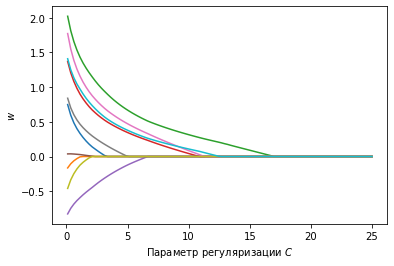

In [7]:
plt.plot(Cs, parameters)

plt.xlabel('Параметр регуляризации $C$')
plt.ylabel('$w$')

plt.savefig(
    os.path.join(figures, 'log_reg_cs_exp.eps'),
    bbox_inches='tight')

plt.show()